# spaCy Basics

**spaCy** (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).

In [1]:
#!pip install -U spacy

In [2]:
#!python -m spacy download en

# Working with spaCy in Python

In [3]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

___
# spaCy Objects

After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.

___
# Pipeline
When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.

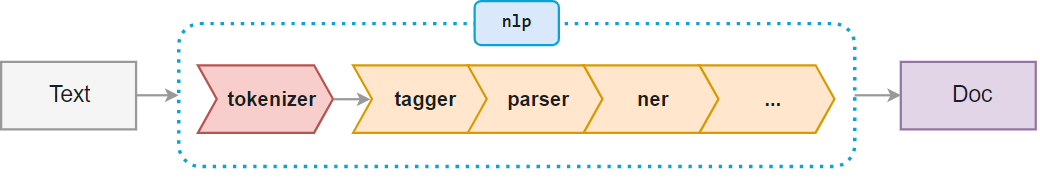

In [4]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f86339ef180>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f8633a377c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f8632c1c7c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f86338104c0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f8633aab6c0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f8633a0f080>)]

In [5]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

___
## 1. Tokenization

In [6]:
# Create a string that includes opening and closing quotation marks
mystring = '"We\'re moving to L.A.!"'
print(mystring)

"We're moving to L.A.!"


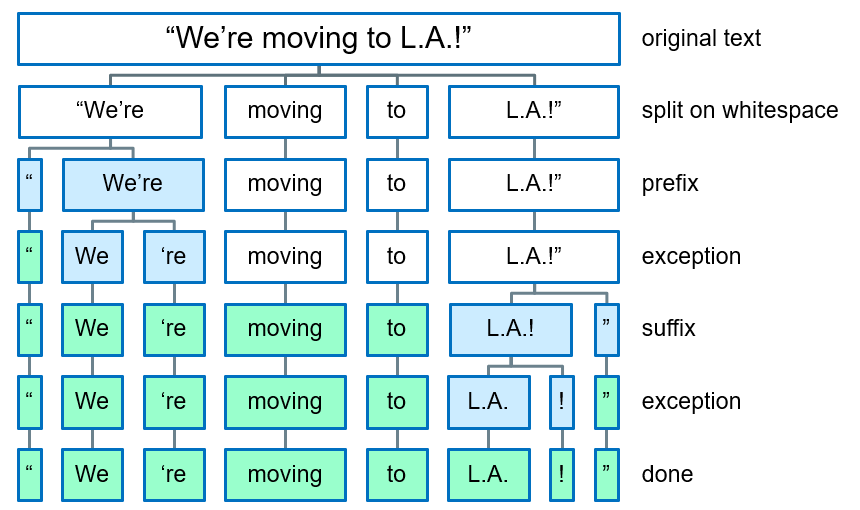

-  **Prefix**:	Character(s) at the beginning &#9656; `$ ( “ ¿`
-  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
-  **Infix**:	Character(s) in between &#9656; `- -- / ...`
-  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied &#9656; `St. U.S.`

In [7]:
# Create a Doc object and explore tokens
doc = nlp(mystring)

for token in doc:
    print(token.text, end=' | ')

" | We | 're | moving | to | L.A. | ! | " | 

In [8]:
# Print each token separately
for token in doc:
    print(token.text, token.pos_, token.dep_)

" PUNCT ROOT
We PRON nsubj
're AUX aux
moving VERB ROOT
to ADP prep
L.A. PROPN pobj
! PUNCT punct
" PUNCT punct


In [9]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com!")

for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
us
at
http://www.oursite.com
!


In [10]:
doc3 = nlp(u"Tesla isn't  looking into startups anymore.")

for token in doc3:
    print(token.text)

Tesla
is
n't
 
looking
into
startups
anymore
.


In [11]:
doc3

Tesla isn't  looking into startups anymore.

In [12]:
doc3[0]

Tesla

In [13]:
type(doc3)

spacy.tokens.doc.Doc

___
## 2. Part-of-Speech Tagging (POS)

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [26]:
for token in doc3:
    print(token.text, token.pos_)

Tesla PROPN
is AUX
n't PART
  SPACE
looking VERB
into ADP
startups NOUN
anymore ADV
. PUNCT


In [15]:
doc3[0].pos_

'PROPN'

___
## Additional Token Attributes
Some of the other information that spaCy assigns to tokens are:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [16]:
# Lemmas (the base form of the word):
print(doc3[4].text)
print(doc3[4].lemma_)

looking
look


In [17]:
# Simple Parts-of-Speech & Detailed Tags:
print(doc3[4].pos_)
print(doc3[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / verb, base form


In [18]:
# Word Shapes:
print(doc3[0].text+': '+doc2[0].shape_)
print(doc[5].text+' : '+doc[5].shape_)

Tesla: Xx
L.A. : X.X.


In [19]:
# Boolean Values:
print(doc3[0].is_alpha)
print(doc3[0].is_stop)

True
False


### Counting Tokens
`Doc` objects have a set number of tokens

In [20]:
len(doc)

8

### Retrieving Tokens

In [21]:
doc5 = nlp(u'It is better to give than to receive.')

# Retrieve the third token:
doc5[2]

better

In [22]:
# Retrieve three tokens from the middle:
doc5[2:5]

better to give

In [23]:
# Retrieve the last four tokens:
doc5[-4:]

than to receive.

## Tokens cannot be reassigned
Although `Doc` objects can be considered lists of tokens, they do *not* support item reassignment

In [24]:
doc6 = nlp(u'My dinner was horrible.')
doc7 = nlp(u'Your dinner was delicious.')

In [25]:
# Try to change "My dinner was horrible" to "My dinner was delicious"
doc6[3] = doc7[3]

TypeError: 'spacy.tokens.doc.Doc' object does not support item assignment

___
## Spans
 A **span** is a slice of Doc object.

In [ ]:
doc4 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [ ]:
life_quote = doc4[16:30]
print(life_quote)

In [ ]:
type(life_quote)

___
## Sentence Segmentation

In [ ]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [ ]:
for sent in doc4.sents:
    print(sent)

In [ ]:
doc4[6].is_sent_start

## NER

In [27]:
# Write a function to display basic entity info:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [28]:
doc = nlp(u'May I go to Washington, DC next May to see the Washington Monument?')

show_ents(doc)

Washington, DC - GPE - Countries, cities, states
next May - DATE - Absolute or relative dates or periods
the Washington Monument - ORG - Companies, agencies, institutions, etc.


## Entity annotations
`Doc.ents` are token spans with their own set of annotations.
<table>
<tr><td>`ent.text`</td><td>The original entity text</td></tr>
<tr><td>`ent.label`</td><td>The entity type's hash value</td></tr>
<tr><td>`ent.label_`</td><td>The entity type's string description</td></tr>
<tr><td>`ent.start`</td><td>The token span's *start* index position in the Doc</td></tr>
<tr><td>`ent.end`</td><td>The token span's *stop* index position in the Doc</td></tr>
<tr><td>`ent.start_char`</td><td>The entity text's *start* index position in the Doc</td></tr>
<tr><td>`ent.end_char`</td><td>The entity text's *stop* index position in the Doc</td></tr>
</table>

In [29]:
doc = nlp(u'Can I please borrow 500 dollars from you to buy some Microsoft stock?')

for ent in doc.ents:
    print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

500 dollars 4 6 20 31 MONEY
Microsoft 11 12 53 62 ORG


## NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

### Visualizing NER

In [30]:
# Import the displaCy library
from spacy import displacy

In [31]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million. '
         u'By contrast, Sony sold only 7 thousand Walkman music players.')

displacy.render(doc, style='ent', jupyter=True)

In [32]:
options = {'ents': ['ORG', 'PRODUCT']}

In [33]:
displacy.render(doc, style='ent', jupyter=True, options=options)

In [34]:
colors = {'ORG': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'PRODUCT': 'radial-gradient(yellow, green)'}

options = {'ents': ['ORG', 'PRODUCT'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)

# Stemming

### Porter Stemmer

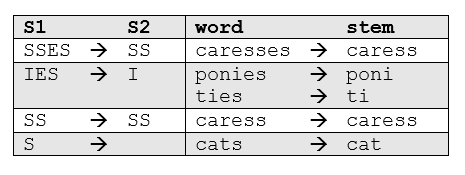

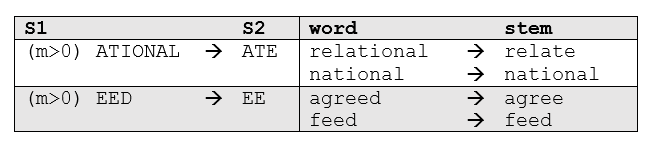

In [36]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import *

In [37]:
p_stemmer = PorterStemmer()

In [38]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [39]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


### Snowball Stemmer

In [40]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [41]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [42]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


# Lemmatization

In [43]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_,  '\t', token.lemma_)

I 	 PRON 	 I
am 	 AUX 	 be
a 	 DET 	 a
runner 	 NOUN 	 runner
running 	 VERB 	 run
in 	 ADP 	 in
a 	 DET 	 a
race 	 NOUN 	 race
because 	 SCONJ 	 because
I 	 PRON 	 I
love 	 VERB 	 love
to 	 PART 	 to
run 	 VERB 	 run
since 	 SCONJ 	 since
I 	 PRON 	 I
ran 	 VERB 	 run
today 	 NOUN 	 today


In [44]:
### Function to display lemmas
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}}  {token.lemma_}')

In [45]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON    I
saw          VERB    see
eighteen     NUM     eighteen
mice         NOUN    mouse
today        NOUN    today
!            PUNCT   !


In [46]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

In [47]:
show_lemmas(doc3)

I            PRON    I
am           AUX     be
meeting      VERB    meet
him          PRON    he
tomorrow     NOUN    tomorrow
at           ADP     at
the          DET     the
meeting      NOUN    meeting
.            PUNCT   .


In [48]:
phrase = 'I am meeting him tomorrow at the meeting'
for word in phrase.split():
    print(word+' --> '+p_stemmer.stem(word))

I --> I
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


# Stop Words

In [49]:
len(nlp.Defaults.stop_words)

326

In [50]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

{'elsewhere', 'did', 'against', 'put', 'have', 'becoming', 'front', 'them', 'per', 'next', 'which', '‘s', '‘ve', 'eight', 'herself', 'nine', 'into', 'anything', 'side', 'serious', 'do', 'mostly', 'just', '’m', 'latter', 'formerly', 'show', 'above', 'besides', 'we', 'via', 'n’t', 'whoever', 'of', 'was', 'third', 'across', 'does', 'either', 'very', 'your', 'here', 'nobody', 'being', 'made', "'ll", 'both', 'by', 'everything', 'our', 'still', 'least', 'thus', 'indeed', 'more', 'ca', 'see', 'hereafter', 'other', 'used', 'up', 'him', 'everyone', 'hereby', 'will', 'could', 'no', 'everywhere', 'latterly', 'same', 'whose', 'become', 'whereby', 'to', 'anywhere', 'becomes', 'therefore', 'a', 'last', 'none', 'about', 'whether', 'these', 'anyway', 'during', 'my', 'i', 'also', 'whither', 'how', 'though', 'or', 'afterwards', 'there', 'this', 'whereupon', 'are', 'yourselves', 'became', 'anyone', 'name', 'once', 'upon', 'any', "n't", 'however', 'noone', 'beforehand', 'off', 'quite', 'were', 'get', 'wha

In [51]:
nlp.vocab['myself'].is_stop

True

In [52]:
nlp.vocab['mystery'].is_stop

False

## Add a stop word

In [53]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')

# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [54]:
len(nlp.Defaults.stop_words)

327

In [55]:
### To remove a stop word

# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('beyond')

# Remove the stop_word tag from the lexeme
nlp.vocab['beyond'].is_stop = False

In [56]:
len(nlp.Defaults.stop_words)

326

In [57]:
nlp.vocab['beyond'].is_stop

False